In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import shutil
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import Image, display
import pandas as pd
import seaborn as sns
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
root_directory = ("/content/drive/MyDrive/Weld_detection")
train_directory = ("/content/drive/MyDrive/Weld_detection/train/images")

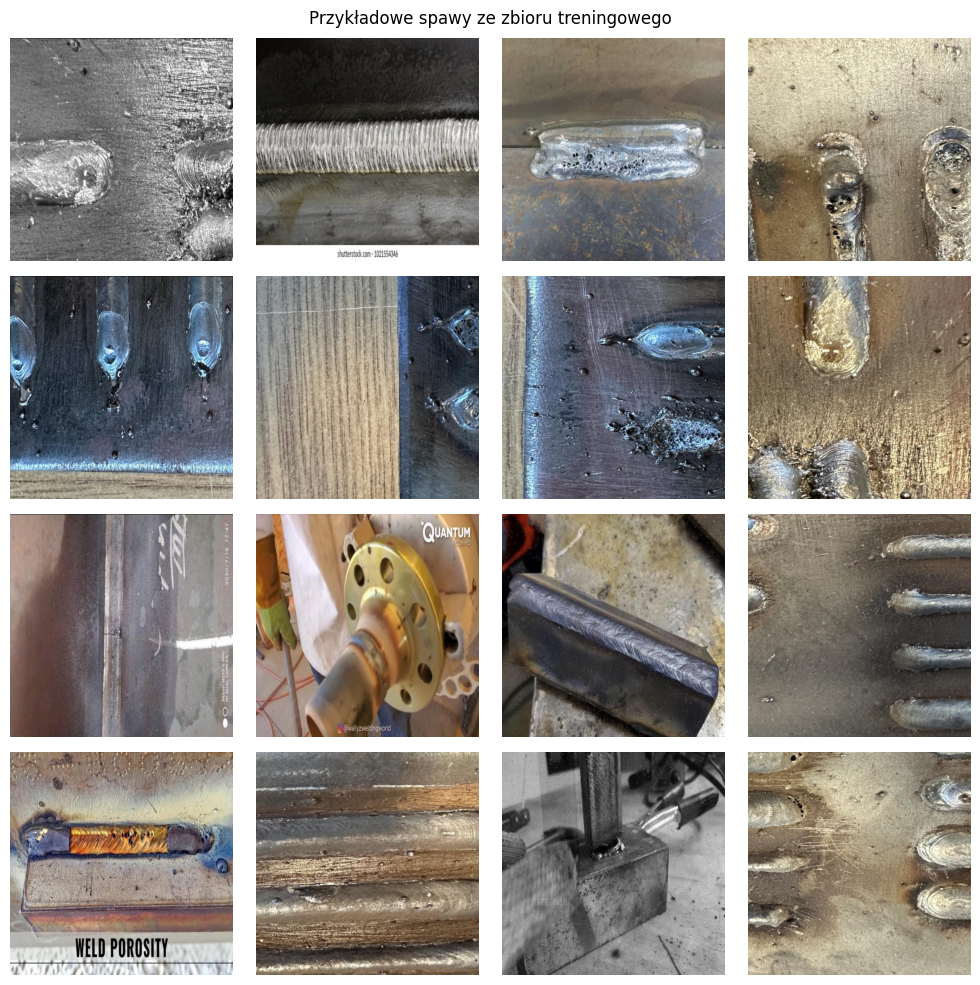

In [6]:
image_files = [f for f in os.listdir(train_directory) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

random_images = random.sample(image_files, 16)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_name in zip(axes.flatten(), random_images):
    img_path = os.path.join(train_directory, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")

fig.suptitle("Przykładowe spawy ze zbioru treningowego")
plt.tight_layout()
plt.show()

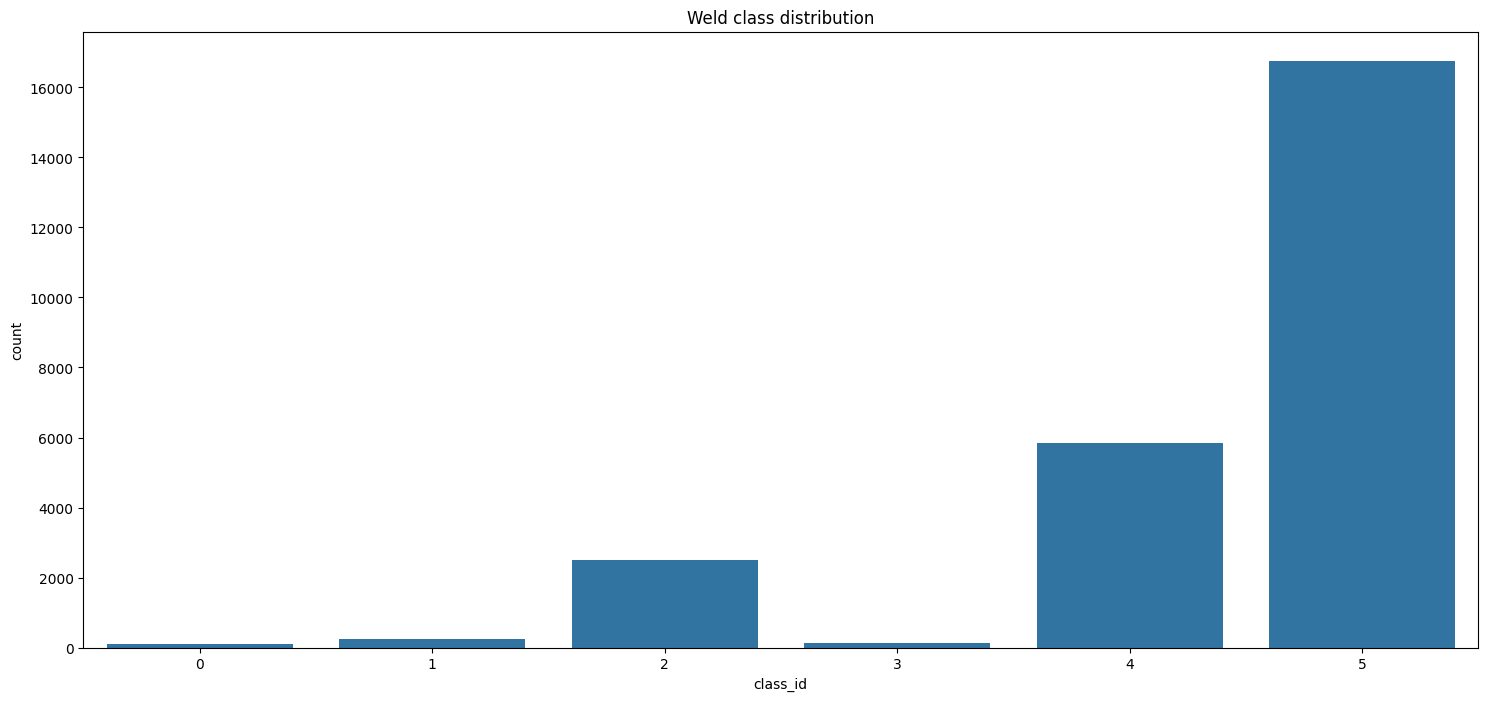

In [7]:
def labels(label_directory):
    label_files = os.listdir(label_directory)
    data = []

    for lab in label_files:
        with open(os.path.join(label_directory, lab), "r") as file:
            lines = file.readlines()
            for line in lines:
                values = list(map(float, line.strip().split()))

                class_id = int(values[0])
                points = values[1:]
                data.append([lab, class_id, points])

    df = pd.DataFrame(data, columns=['file', 'class_id', 'polygon'])
    return df

train_labels = labels("/content/drive/MyDrive/Weld_detection/train/labels")

plt.figure(figsize=(18,8))
sns.countplot(data=train_labels, x="class_id")
plt.title("Weld class distribution")
plt.show()

In [8]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 326MB/s]


In [9]:
model.train(data="/content/drive/MyDrive/Weld_detection/data.yaml", epochs=50)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Weld_detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 3.90MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 232MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Weld_detection/train/labels... 1107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1107/1107 [00:17<00:00, 64.71it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.0796e002c87e60355b14a1a7e36e6128.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.2122f7adcbe77d67d0a237c89bd8ea81.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.3b1455b12ea1db0a62f22a332cd2d29f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.6462084eeebf7c80dbd01f48c88cc7d7.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.78f17d2b0fdb166df040926cebba7469.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/train/images/IMG_3647_block_1_2_png_jpg.rf.81d3949f7261b5e63c8e8a4e4c84c565.jpg: 1 duplicate labels removed
train: WARNING ⚠

train: New cache created: /content/drive/MyDrive/Weld_detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Weld_detection/valid/labels... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [02:30<00:00,  1.27it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/valid/images/IMG_3743_block_1_0_png_jpg.rf.543766cd632a2699c6fa14ad5851adbb.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Weld_detection/valid/images/IMG_3743_block_1_1_png_jpg.rf.22a2e72846091adcd22c79d11c717244.jpg: 3 duplicate labels removed
val: New cache created: /content/drive/MyDrive/Weld_detection/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.02G       1.86      2.419      1.244         21        640: 100%|██████████| 70/70 [01:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]

                   all        190       1830      0.182      0.251      0.141     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.24G      1.775      1.643      1.193         97        640: 100%|██████████| 70/70 [01:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        190       1830      0.159      0.244      0.152     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       9.3G      1.785      1.673      1.209          5        640: 100%|██████████| 70/70 [01:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        190       1830      0.212      0.326      0.169     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.35G      1.757      1.524      1.191         16        640: 100%|██████████| 70/70 [01:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        190       1830      0.398      0.188       0.19     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.37G      1.709      1.487      1.179         32        640: 100%|██████████| 70/70 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        190       1830      0.451      0.189      0.184     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.44G      1.684      1.426      1.157        160        640: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        190       1830      0.363      0.249      0.239      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.48G       1.66      1.387       1.16         35        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        190       1830      0.358      0.252      0.222      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       9.5G      1.634      1.368      1.141        106        640: 100%|██████████| 70/70 [01:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        190       1830      0.459      0.316      0.274      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.55G      1.603      1.289       1.13         79        640: 100%|██████████| 70/70 [01:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        190       1830      0.316      0.382      0.298      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.55G      1.579      1.247      1.105         37        640: 100%|██████████| 70/70 [01:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        190       1830      0.318      0.324      0.277      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.55G       1.55      1.229       1.11         82        640: 100%|██████████| 70/70 [01:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        190       1830      0.374        0.3      0.279      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.55G      1.568      1.221      1.103        108        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        190       1830      0.372      0.398      0.328      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.55G      1.523      1.181      1.085         66        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        190       1830       0.42      0.351      0.333       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.55G      1.478       1.14      1.071        146        640: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        190       1830      0.321      0.353      0.312      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.55G      1.453      1.074      1.063         73        640: 100%|██████████| 70/70 [01:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        190       1830      0.368      0.414      0.339      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.1G       1.48      1.113      1.078         36        640: 100%|██████████| 70/70 [01:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        190       1830      0.404      0.393      0.362      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.1G      1.428      1.065      1.051         21        640: 100%|██████████| 70/70 [01:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        190       1830      0.469       0.36      0.361      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.4G      1.425       1.05       1.05         95        640: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        190       1830      0.336      0.447      0.342      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.4G      1.423      1.053      1.056        132        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        190       1830      0.387      0.446       0.35      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.4G      1.383      1.001       1.04         54        640: 100%|██████████| 70/70 [01:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        190       1830      0.382      0.421      0.363      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.4G      1.376     0.9907      1.024         56        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        190       1830      0.442      0.389       0.37      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.4G      1.353      0.958       1.02         97        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        190       1830      0.444      0.445      0.386      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.4G      1.337     0.9345      1.019         85        640: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        190       1830      0.451      0.428      0.408       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.4G       1.33      0.924      1.026         43        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        190       1830      0.428        0.5      0.422      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.4G       1.31     0.9082      1.006         64        640: 100%|██████████| 70/70 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        190       1830      0.469        0.4      0.394        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.4G      1.289     0.8879      0.996         96        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        190       1830      0.463      0.399      0.391      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.5G      1.276     0.8695     0.9976         74        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        190       1830      0.525      0.447      0.439      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.3G      1.274     0.8497     0.9859         26        640: 100%|██████████| 70/70 [01:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        190       1830      0.471      0.463      0.418      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.3G      1.224     0.8145     0.9795         88        640: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        190       1830       0.59      0.425      0.444      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.3G      1.227     0.8016     0.9776         58        640: 100%|██████████| 70/70 [01:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        190       1830      0.502      0.488      0.464      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.3G      1.213     0.8002     0.9776        117        640: 100%|██████████| 70/70 [01:03<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        190       1830      0.471      0.505      0.465      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.3G      1.226     0.7897     0.9662         91        640: 100%|██████████| 70/70 [01:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        190       1830       0.44      0.497      0.443      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.3G      1.172     0.7548     0.9549         82        640: 100%|██████████| 70/70 [01:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        190       1830      0.465      0.482       0.46      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.3G      1.177     0.7474     0.9583         37        640: 100%|██████████| 70/70 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        190       1830      0.523      0.471      0.472      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.3G      1.158     0.7413     0.9507         29        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        190       1830      0.503      0.503      0.485      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.3G      1.148     0.7151     0.9474        205        640: 100%|██████████| 70/70 [01:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        190       1830      0.512      0.494      0.483      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.3G      1.147     0.7246     0.9487         96        640: 100%|██████████| 70/70 [01:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        190       1830      0.559      0.465      0.474      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.3G      1.113     0.6996     0.9461         88        640: 100%|██████████| 70/70 [01:05<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        190       1830      0.523        0.5      0.488      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.3G      1.117     0.6998     0.9411         77        640: 100%|██████████| 70/70 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        190       1830      0.532      0.505      0.495      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.3G        1.1     0.6809     0.9374         65        640: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        190       1830       0.45       0.53      0.493      0.275


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.3G      1.071     0.6567     0.9319         15        640: 100%|██████████| 70/70 [00:44<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        190       1830      0.556      0.504      0.502       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.3G      1.083     0.6478     0.9342         26        640: 100%|██████████| 70/70 [00:41<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        190       1830      0.557      0.481      0.498      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.3G      1.046     0.6217     0.9262        134        640: 100%|██████████| 70/70 [00:41<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        190       1830      0.638      0.467      0.525      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.4G      1.029     0.5966     0.9181         39        640: 100%|██████████| 70/70 [00:43<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        190       1830      0.558      0.534      0.517      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.4G      1.022      0.585     0.9093         53        640: 100%|██████████| 70/70 [00:42<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        190       1830      0.624      0.512      0.541      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.4G      1.008     0.5791     0.9084         29        640: 100%|██████████| 70/70 [00:42<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        190       1830      0.551      0.565      0.536      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.4G     0.9844     0.5588     0.9021        138        640: 100%|██████████| 70/70 [00:42<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        190       1830      0.658       0.49      0.537      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.4G     0.9766     0.5551     0.9035         61        640: 100%|██████████| 70/70 [00:41<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        190       1830       0.55      0.543      0.538      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.4G     0.9639     0.5475     0.9002         44        640: 100%|██████████| 70/70 [00:42<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        190       1830      0.626      0.538      0.544      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.4G     0.9472     0.5358     0.8934         81        640: 100%|██████████| 70/70 [00:42<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        190       1830      0.642      0.514      0.542      0.321



50 epochs completed in 0.981 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]


                   all        190       1830      0.642      0.513      0.542      0.322
           Bad Welding         31         34      0.597      0.324      0.402      0.284
                 Crack         53         63      0.752       0.73      0.748      0.434
  Excess Reinforcement         29        138      0.423      0.217      0.241      0.103
          Good Welding         43         55      0.754      0.727      0.679       0.44
              Porosity         51        634      0.622      0.618       0.61       0.35
              Spatters         31        906      0.703      0.464      0.574       0.32
Speed: 0.6ms preprocess, 10.6ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1f1212aa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

Model evaluation and testing


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/received_563984775746503_jpeg_jpg.rf.b90a6c8cca199788dbfaf1530822f2c6.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


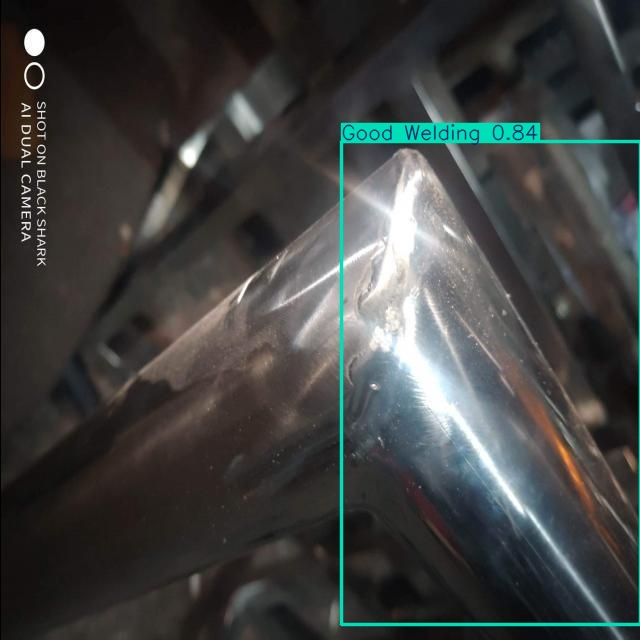


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/IMG20220608112222_jpg.rf.094d582099cc9c625920a3ec4642a368.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.4ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


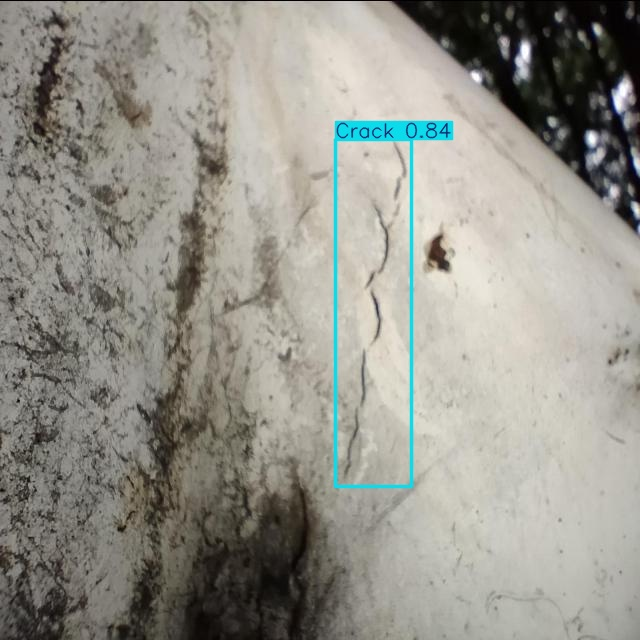


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Screenshot-2022-12-05-231906_jpeg_jpg.rf.654f4f595faa6dbd0123815ceb4b0910.jpg: 640x640 (no detections), 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


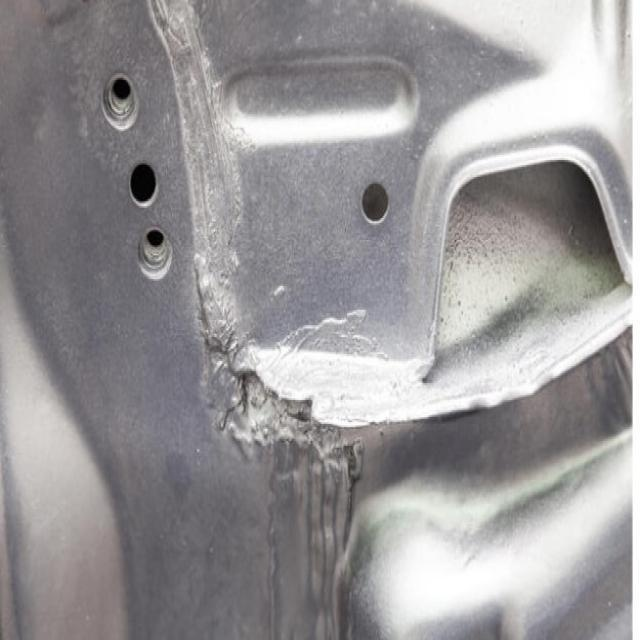


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/IMG_3622_block_0_1_png_jpg.rf.1bf3bd260f60b427aa45d68a274e509a.jpg: 640x640 35 Spatterss, 39.7ms
Speed: 4.3ms preprocess, 39.7ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


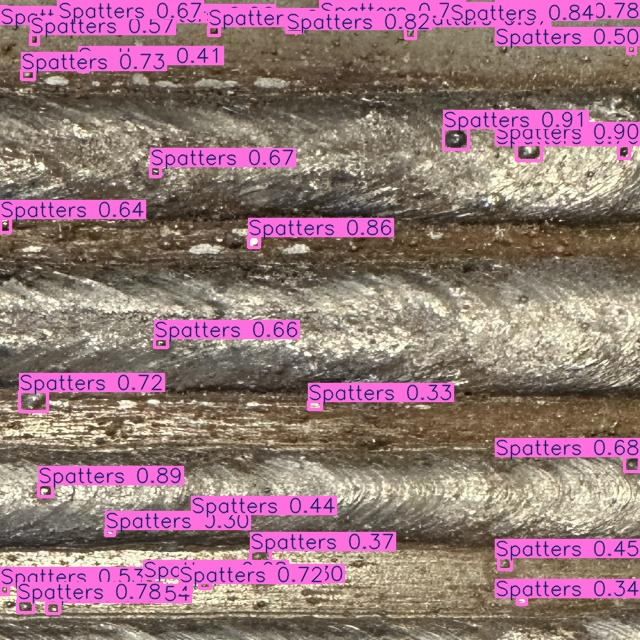


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/good-tig-welds_36_jpeg_jpg.rf.07837c9ecb441a7f8e6ac5907a9cbd41.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 3.1ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


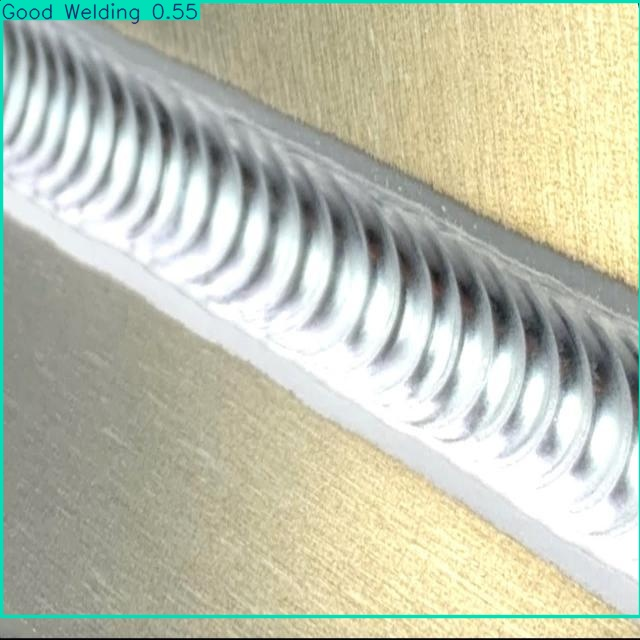


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/nut-moi-han_jpg.rf.9c3cfe32a6efeebd01404f3474b2db49.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


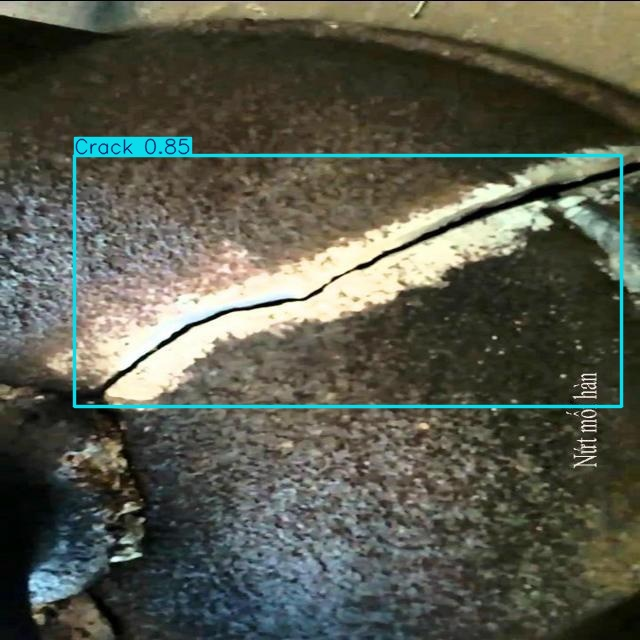


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Good-Welding-images_28_png_jpg.rf.885ac99ccb654ddda42ce1684d32de69.jpg: 640x640 2 Good Weldings, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


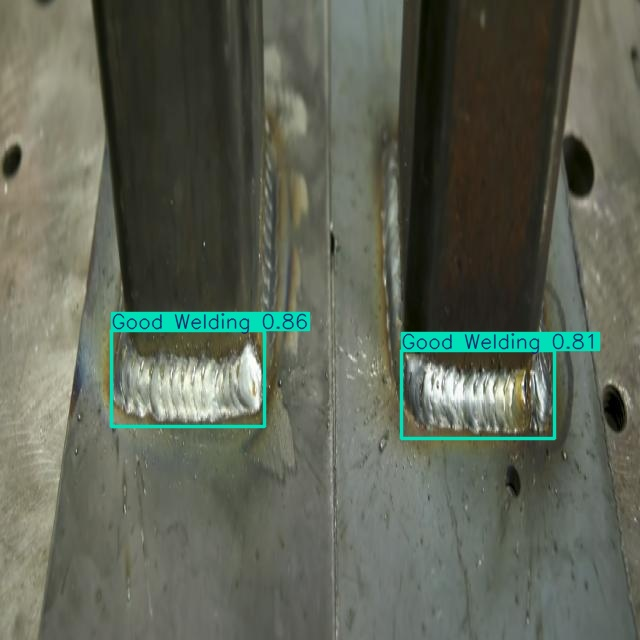


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/images-12-1-_jpeg_jpg.rf.c9fc5754e762c3ee115e9aa657908685.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


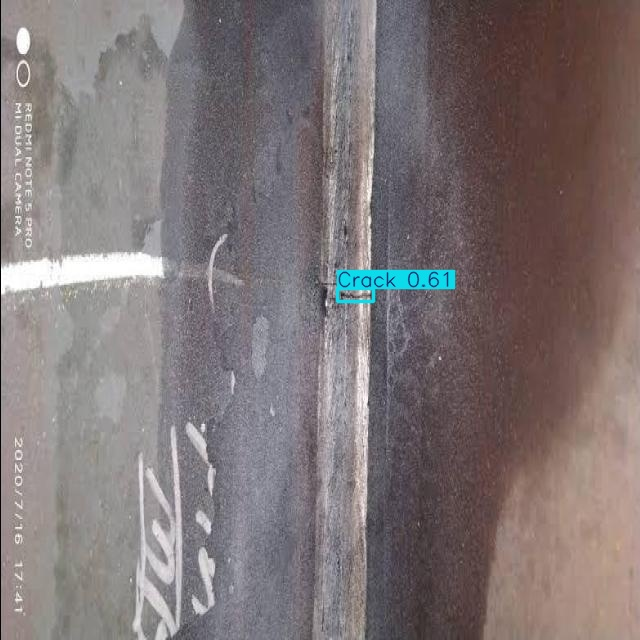


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/good_weld_vid626_jpeg_jpg.rf.0b13461f83dccd083335c6f55e03a01d.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


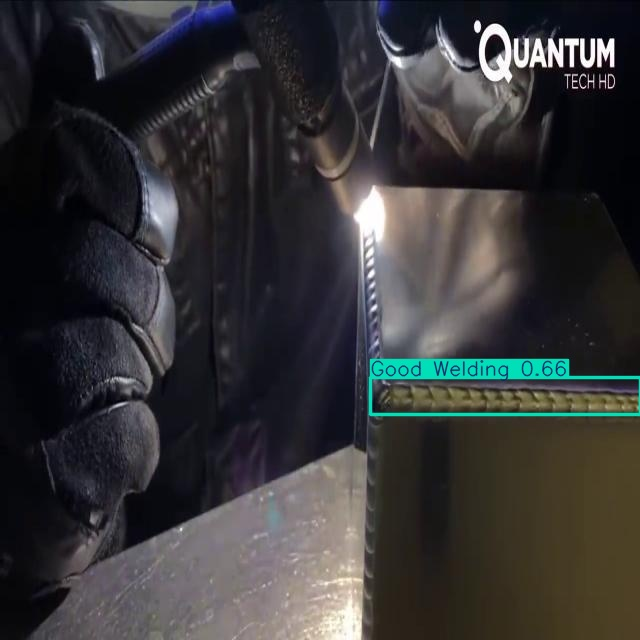


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/good-stick-welds_39_jpeg_jpg.rf.6c6a81efbe672fd73cbe3b19c587dc95.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


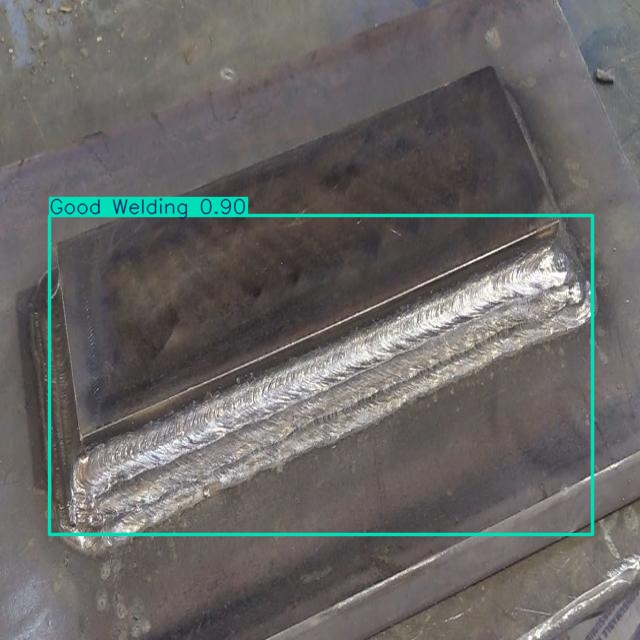


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/welding-seam_Praphan-Jampala_shutterstock_jpg.rf.c712f0c361e2b7a095a268f1bf07d5f8.jpg: 640x640 4 Porositys, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


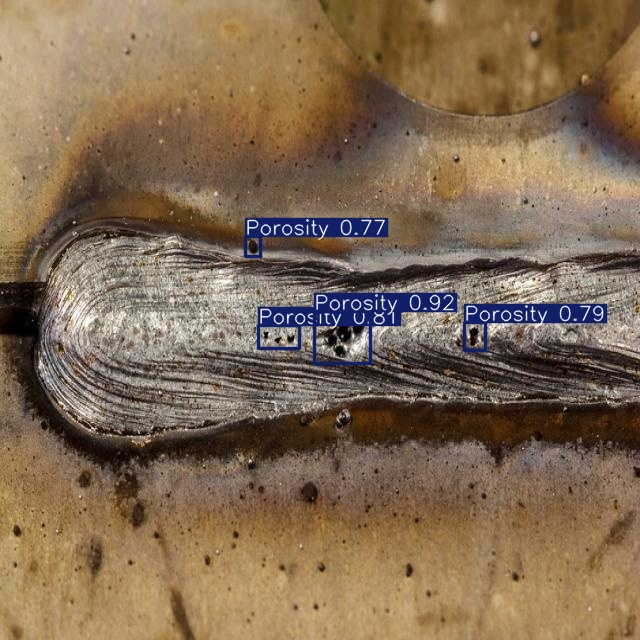


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/IMG_3750_block_1_0_png_jpg.rf.b83c58a811fed976ea66d8628f0d1597.jpg: 640x640 1 Excess Reinforcement, 22 Spatterss, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


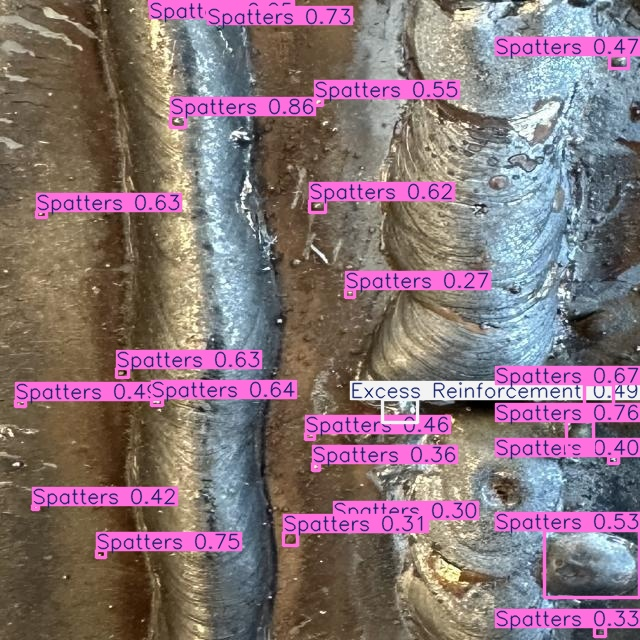


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/good_weld_vid1520_jpeg_jpg.rf.2575e1ceabbb1d8aa68554a45db1d239.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 2.8ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


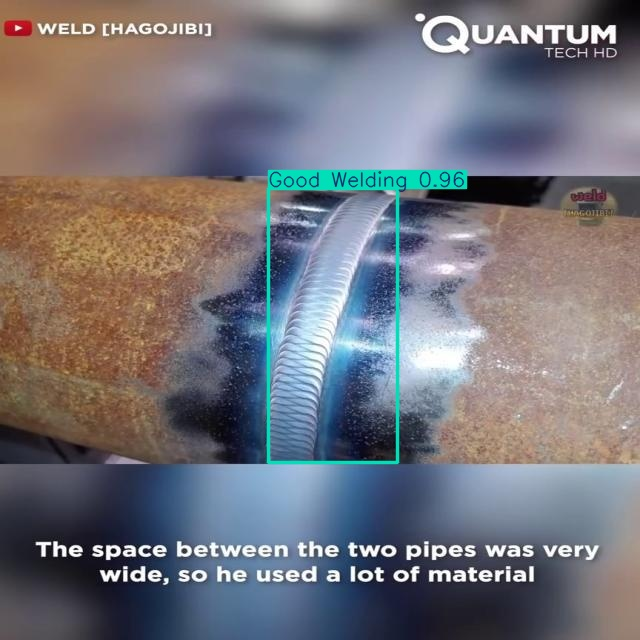


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/images_jpg.rf.3df4e1e28fa37c610dfdf3d20703f219.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


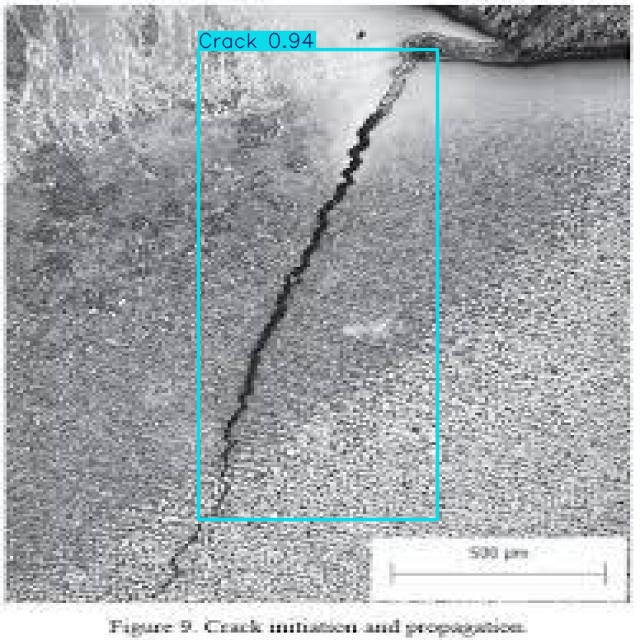


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/IMG_20230131_114428_jpg.rf.cb38a5264d7db5557a5d53e5aeec8288.jpg: 640x640 8 Porositys, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


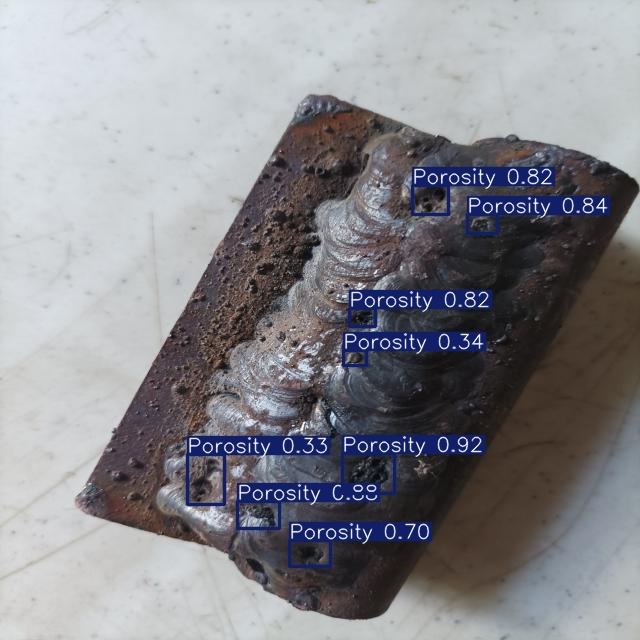


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/causes-of-casting-cracks-and-six-kinds-of-common-defects-and-their-prevention_jpg.rf.af9f0ae4085b407cd97b13992c4988a9.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


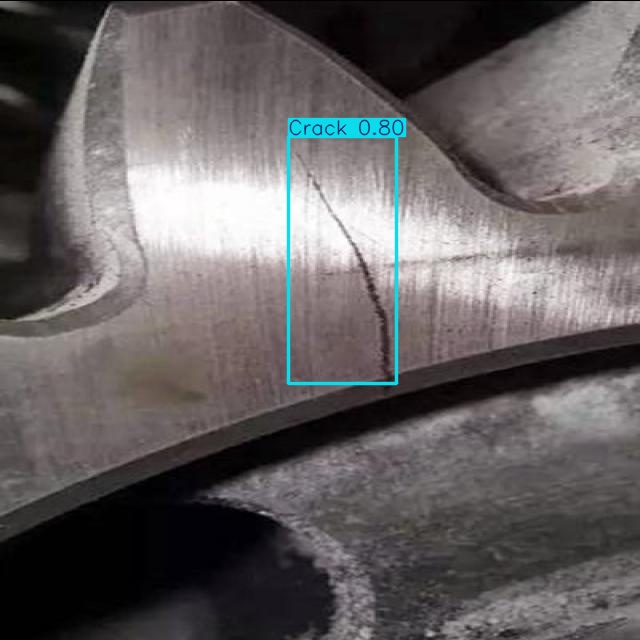


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/bad_weld_vid686_jpeg_jpg.rf.025268c35f6da7729d36d4e312a26d76.jpg: 640x640 2 Bad Weldings, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


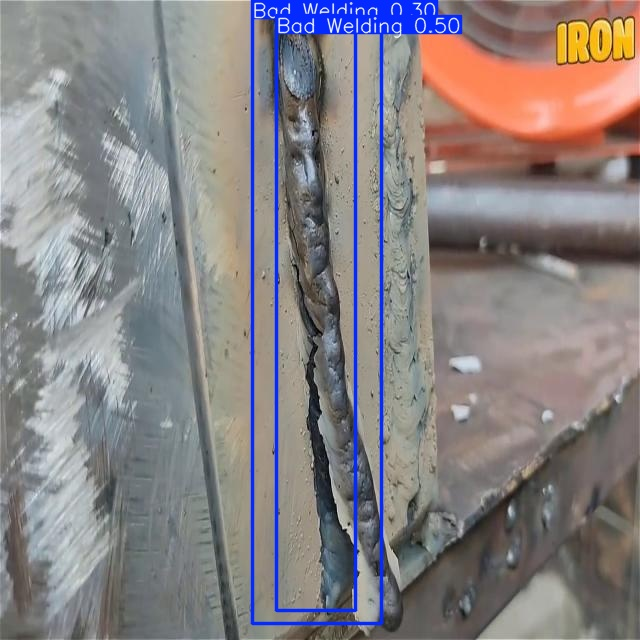


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/images-16-_jpg.rf.7015704a3d7cc7b906b069620fccc8af.jpg: 640x640 2 Cracks, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


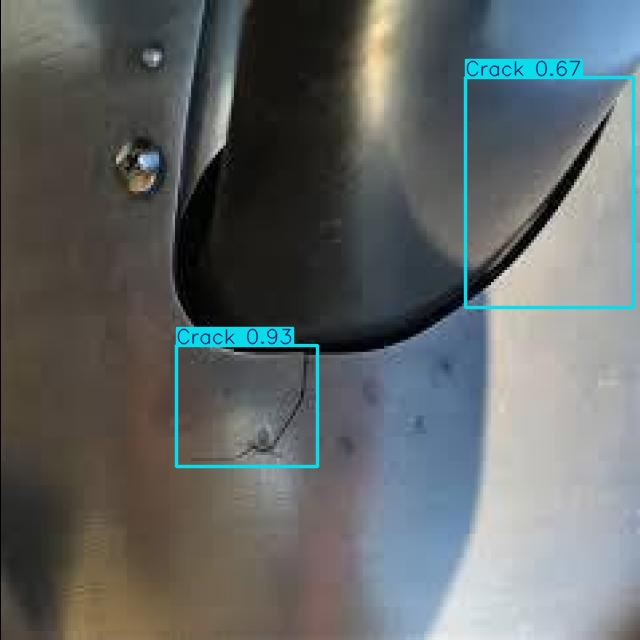


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/received_1563671254061284_jpeg_jpg.rf.3d09f0f328d33d5f44999ae53688a58a.jpg: 640x640 1 Crack, 1 Spatters, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


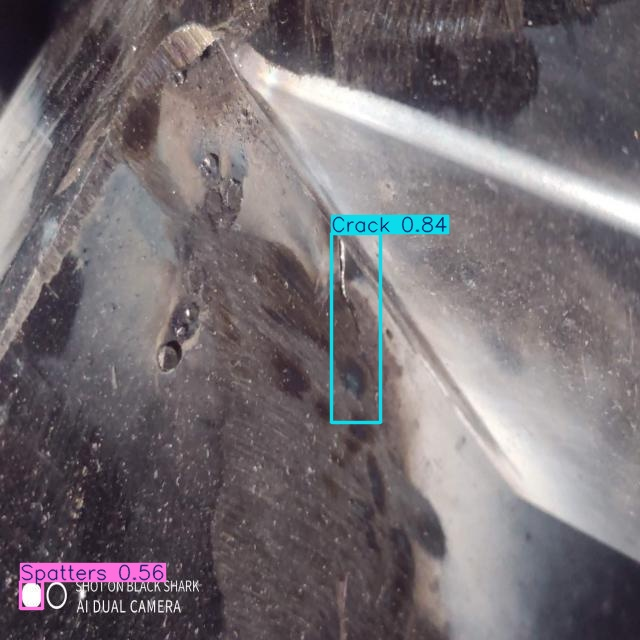


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/bad_weld_vid693_jpeg_jpg.rf.52d627a4c5669e8a295438b40e467a07.jpg: 640x640 3 Bad Weldings, 37.1ms
Speed: 3.4ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


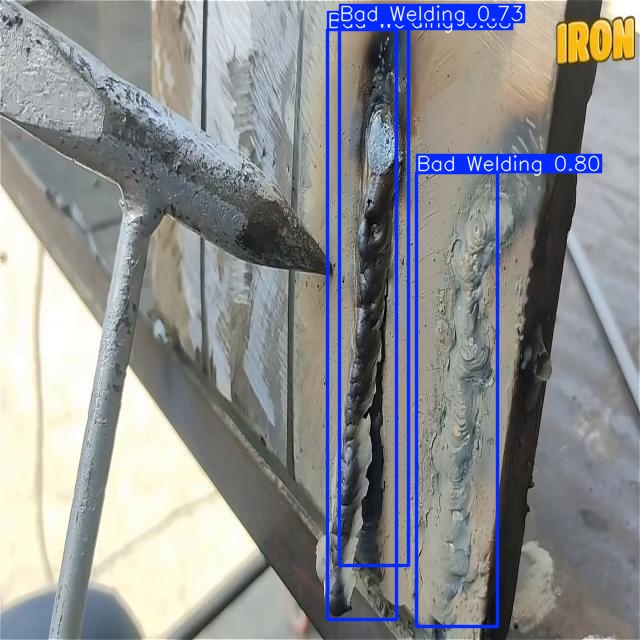


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Screenshot-2023-02-08-103645_png_jpg.rf.68dae72f49a6e474ba4250da2ed33428.jpg: 640x640 4 Porositys, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


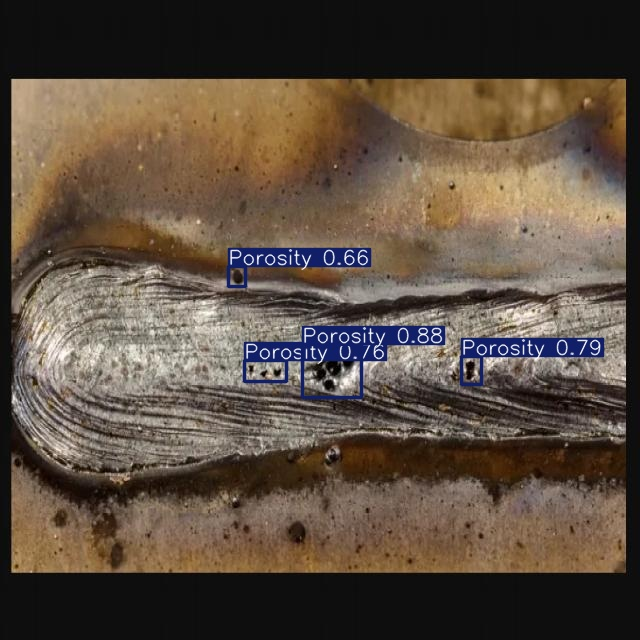


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/bad_weld_vid449_jpeg_jpg.rf.38e89a21c66d69f44707e024f9673a83.jpg: 640x640 1 Bad Welding, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


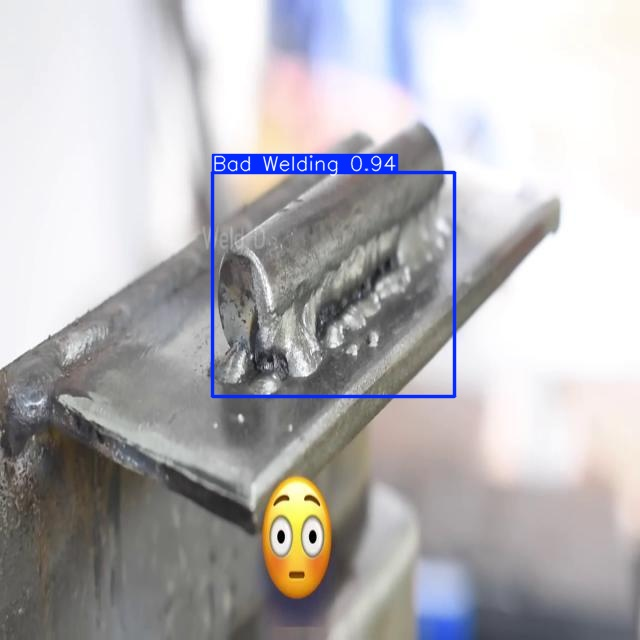


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/ER-3-_jpg.rf.639aa46fa0f55d54020b6dc0fbc1ca21.jpg: 640x640 1 Bad Welding, 1 Crack, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


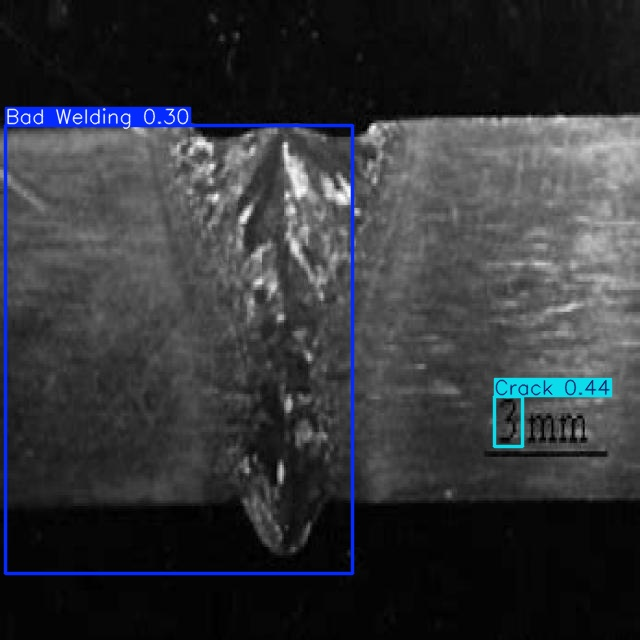


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/images-11-_jpg.rf.5d7575621ad0194c1e43a7064ee57d2d.jpg: 640x640 1 Crack, 37.0ms
Speed: 2.4ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


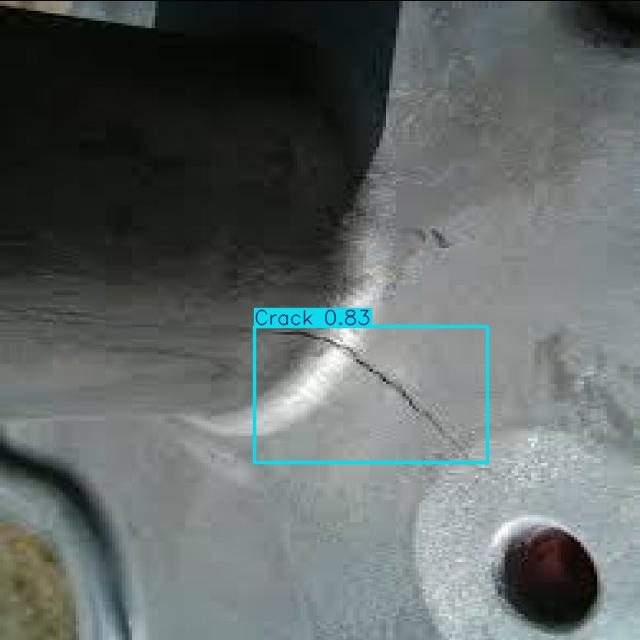


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Screenshot-2023-02-08-102851_png_jpg.rf.f832b355b50f4e32e820c899246e44aa.jpg: 640x640 12 Porositys, 37.2ms
Speed: 4.9ms preprocess, 37.2ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


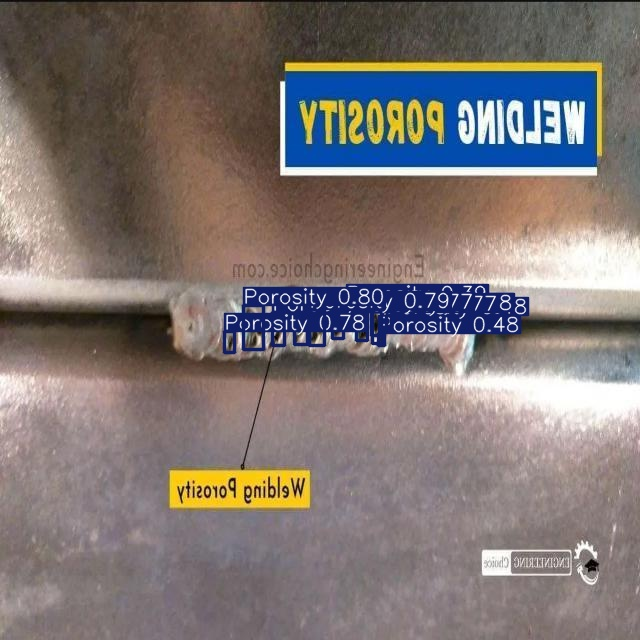


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Steel-with-Hydrogen-Induced-Cracks-01_jpg.rf.fd38f135d3101319bf34843386792d3b.jpg: 640x640 1 Crack, 37.3ms
Speed: 2.5ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


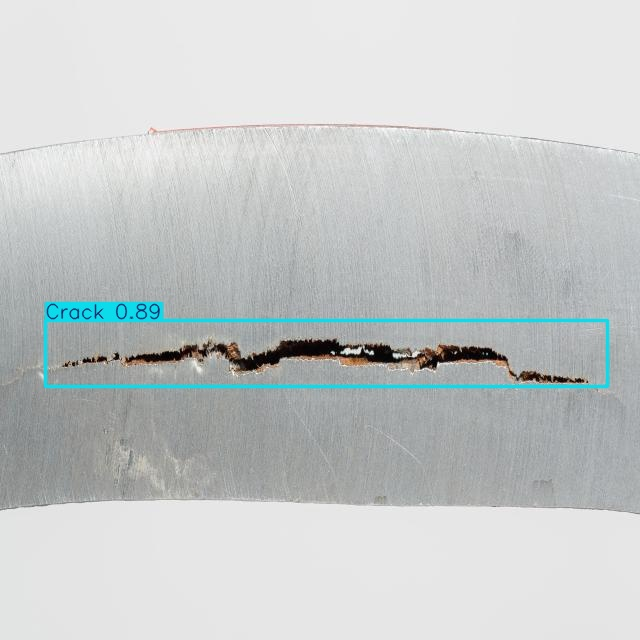


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/280762807_311425284525653_2090801215891852066_n_png_jpg.rf.34f4133c0ff48977de073691c493eea1.jpg: 640x640 1 Crack, 37.1ms
Speed: 2.6ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


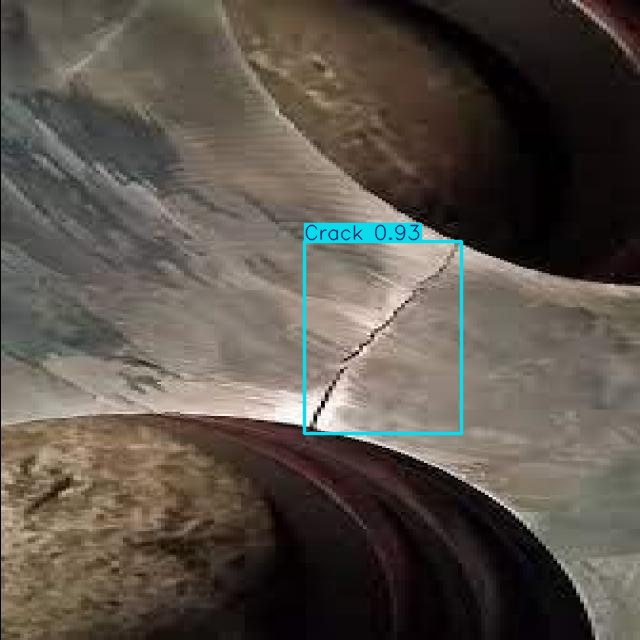


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/bad_weld_vid168_jpeg_jpg.rf.b872bdda70bc5a8c6dcfe378a75cad2f.jpg: 640x640 1 Good Welding, 37.0ms
Speed: 2.4ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


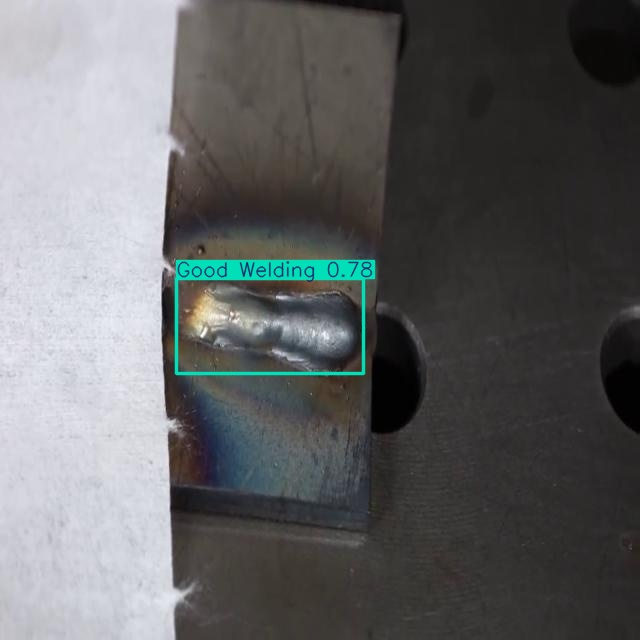


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/Screenshot-2022-12-05-223730_jpeg_jpg.rf.54d6c1d677d4c36f698801a9db779ea6.jpg: 640x640 1 Bad Welding, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


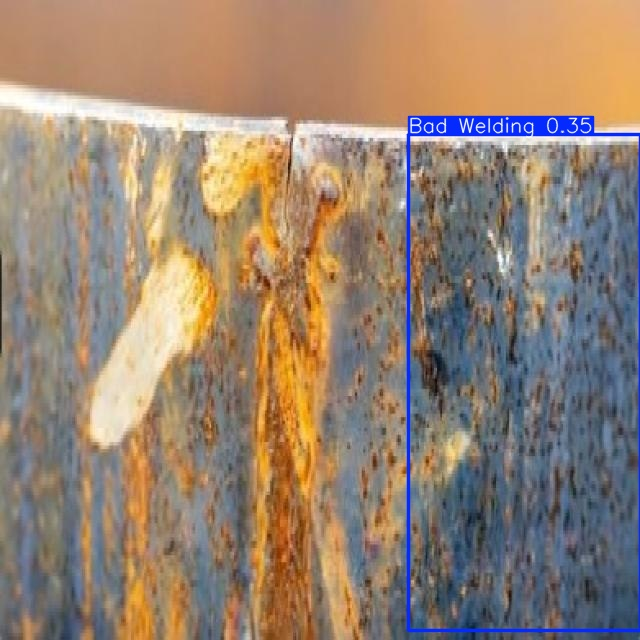


image 1/1 /content/drive/MyDrive/Weld_detection/test/images/good-stick-welds_36_jpeg_jpg.rf.434032bd1967fb7925de0f9fe20a1305.jpg: 640x640 1 Good Welding, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


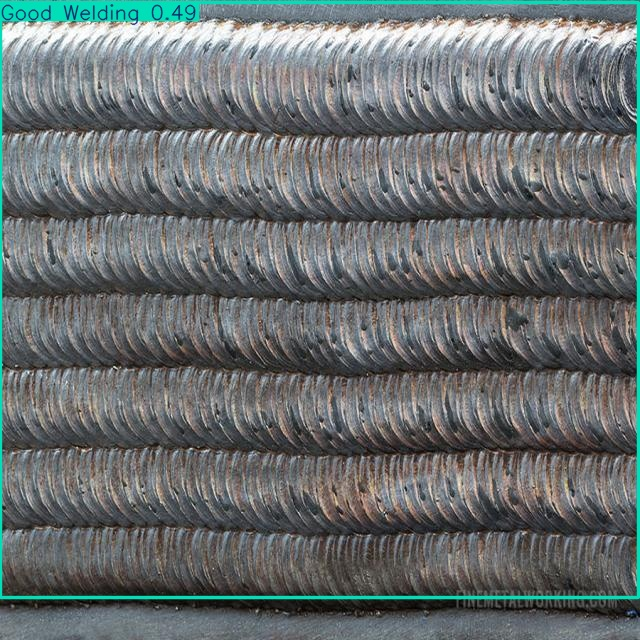

In [11]:
def results(model, image_directory, number_of_images=30):
    images = os.listdir(image_directory)
    sample = random.sample(images, number_of_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)

    for image_name in sample:
        image_path = os.path.join(image_directory, image_name)
        results = model(image_path)
        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            display(Image(filename=result_image_path))

results(model,"/content/drive/MyDrive/Weld_detection/test/images")